	> log info
Error: Variable already exists
	> log info
###################   AMDC LOGGER INFO   ###################

Variable Name:      Index:         Type:         Sample Rate [Hz]:    Number of Samples:
LOG_theta_Enc         0            double        6024.096385542169          5053     

	> log empty_all
['log empty_all', 'SUCCESS']
	> log start
['log start', 'SUCCESS']
	> log stop
['log stop', 'SUCCESS']
	> log dump uart bin 0
Dumping: LOG_theta_Enc
Dump took: 2.563  sec
Dump rate: 1990.785  sps
Num samples: 5102 



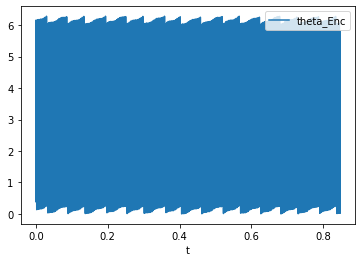

In [24]:
import time
import pathlib as pl
import sys
repo_dir = 'D:\ProjectSpace\GitHub\driveCabinet'                                      # CHANGE THIS TO YOUR REPO DIRECTORY
repo_dir = pl.Path(repo_dir)
scripts_folder = repo_dir / 'AMDC-Firmware' / 'scripts'  
sys.path.append(str(scripts_folder))

from AMDC import AMDC
from AMDC_Logger import AMDC_Logger, find_mapfile

####################   SETUP LOGGER   ####################
amdc = AMDC()
amdc.setup_comm_defaults('uart')
amdc.uart_init('COM3')                         # MIGHT HAVE TO CHANGE THE PORT NUMBER
amdc.connect() #opens up serial communication

mapfile_path = find_mapfile(repo_dir)
logger = AMDC_Logger(AMDC = amdc, mapfile = mapfile_path)
logger.sync()

####################   REGISTER VARIABLES   ####################
user_app_c_code_path = pl.Path(r'D:\ProjectSpace\GitHub\driveCabinet\myCode\usr\encoderTest\task_encoderTest.c')                          # SET THIS TO PATH OF YOUR USER APPLICATION CODE
#logger.auto_register(user_app_c_code_path)
#logger.register('LOG_Ia', var_type = 'float', samples_per_sec = 6000)
# logger.register('LOG_Iqref', var_type = 'float', samples_per_sec = 6000)
# logger.register('LOG_Idref', var_type = 'float', samples_per_sec = 6000)
# logger.register('LOG_Id', var_type = 'double', samples_per_sec = 6000)
# logger.register('LOG_Iq', var_type = 'double', samples_per_sec = 6000)
# #logger.register('LOG_VcDuty', var_type = 'double', samples_per_sec = 6000)
#logger.unregister('LOG_theta_Enc')
logger.register('LOG_theta_Enc', samples_per_sec = 6000, var_type = 'double')


# View which variables are logged
logger.info()
# amdc.cmd("hw pwm off")
# amdc.cmd("hw pwm on")
# amdc.cmd("rlCC id 0")
# amdc.cmd("rlCC iq 2")
####################   COLLECT DATA   ####################
# Clear the logger, then record data
logger.clear_all() 
logger.start()
# DATA IS BEING RECORDED
time.sleep(1)

logger.stop()

####################   DUMP DATA AND PLOT   ####################
data = logger.dump(file = 'Enc15kRPM.csv')
data.plot()


In [4]:
amdc.cmd("help")

PortNotOpenError: Attempting to use a port that is not open

In [22]:
amdc.cmd("tdeinit")

SerialException: Attempting to use a port that is not open

In [6]:
amdc.cmd("tdeinit blink")

NameError: name 'amdc' is not defined

In [5]:
amdc.cmd("tdeinit task_vsi")

	> tdeinit task_vsi
['tdeinit task_vsi', 'UNKNOWN CMD']


['tdeinit task_vsi', 'UNKNOWN CMD']

In [ ]:
amdc.cmd("tdeinit BLINK")